In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import os
os.listdir('./input')

['mental-state.csv']

In [22]:
print(os.listdir('./input'))


['mental-state.csv']


In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [24]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [25]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [26]:
nRowsRead = None # specify 'None' if want to read whole file
# mental-state.csv has 2360 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('https://zedcode.systems/ds/mental-state.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mental-state.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1

There are 2479 rows and 989 columns


lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
0       25.781648    33.836367   -92.769629    19.187957           -1.542262   
1       29.357891    26.792566   417.203910    19.472121          -38.797263   
2       28.451926    31.076434    72.231301    14.245938          -13.225057   
3       21.282184    19.985184    16.220094    39.787312            1.847866   
4       20.431516    28.982168    27.540246    19.960398            2.491458   
...           ...          ...          ...          ...                 ...   
2474    15.762328    19.113555    23.696867     7.568395           -6.503336   
2475    34.675582    34.200645   -57.624820    -4.825609            7.382353   
2476    29.813809    29.623031   -86.503988     7.532121          -19.581287   
2477    59.453973    17.944332   -10.164238    42.568211           -1.300655   
2478    22.893855    30.412723    26.029590    14.249789           -7.101478   

      lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  \
0               0.197462         -119.561133            2.032654   
1             -16.897194          -29.368531           -9.055370   
2              -0.614138          -28.331698           -8.858742   
3               0.670216           -1.820355           20.220724   
4              -6.020503           -1.071166            2.655259   
...                  ...                 ...                 ...   
2474            6.867187          -11.955396          -16.519912   
2475            2.324416           -1.341208           -4.178625   
2476           -0.628400          133.947160           -2.049096   
2477          -19.993690          -54.331696           12.947622   
2478           -0.551013            3.735563           -9.372750   

      lag1_mean_q1_0  lag1_mean_q1_1  ...  freq_669_3  freq_679_3  freq_689_3  \
0          21.596272       33.965587  ...    0.000230    0.000351    0.000547   
1          44.647424       40.893307  ...    0.001671    0.000740    0.001122   
2          31.450289       30.692883  ...    0.000748    0.000569    0.000327   
3          21.404679       20.777411  ...    0.000990    0.005644    0.006891   
4          16.295039       32.658163  ...    0.001659    0.014379    0.014492   
...              ...             ...  ...         ...         ...         ...   
2474       19.838319       14.333094  ...    0.008537    0.008941    0.004102   
2475       26.383597       28.782987  ...    0.003324    0.003593    0.001702   
2476       45.484851       32.163999  ...    0.000754    0.000508    0.000263   
2477       55.203380       40.228490  ...    0.003332    0.003557    0.004063   
2478       30.411574       30.079904  ...    0.002470    0.003917    0.002528   

      freq_699_3  freq_709_3  freq_720_3  freq_730_3  freq_740_3  freq_750_3  \
0       0.000381    0.000350    0.000453    0.000442    0.000325    0.000209   
1       0.000521    0.000624    0.000439    0.001249    0.000727    0.000801   
2       0.000197    0.000833    0.000909    0.000699    0.001165    0.000616   
3       0.010546    0.009583    0.011158    0.008853    0.004551    0.002287   
4       0.002949    0.004575    0.008305    0.007202    0.006957    0.009836   
...          ...         ...         ...         ...         ...         ...   
2474    0.003156    0.003659    0.010179    0.004591    0.013817    0.004536   
2475    0.003121    0.002686    0.001645    0.001770    0.001038    0.001973   
2476    0.000701    0.000797    0.001096    0.000388    0.000529    0.001079   
2477    0.001662    0.002665    0.002353    0.003976    0.001660    0.003229   
2478    0.005357    0.004612    0.004503    0.003669    0.002316    0.004765   

      Label  
0       2.0  
1       2.0  
2       2.0  
3       1.0  
4       2.0  
...     ...  
2474    0.0  
2475    2.0  
2476    2.0  
2477    2.0  
2478    1.0  

[2479 rows x 989 columns]

Let's take a quick look at what the data looks like:

In [27]:
df1.head(5)

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
0    25.781648    33.836367   -92.769629    19.187957           -1.542262   
1    29.357891    26.792566   417.203910    19.472121          -38.797263   
2    28.451926    31.076434    72.231301    14.245938          -13.225057   
3    21.282184    19.985184    16.220094    39.787312            1.847866   
4    20.431516    28.982168    27.540246    19.960398            2.491458   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  lag1_mean_q1_0  \
0            0.197462         -119.561133            2.032654       21.596272   
1          -16.897194          -29.368531           -9.055370       44.647424   
2           -0.614138          -28.331698           -8.858742       31.450289   
3            0.670216           -1.820355           20.220724       21.404679   
4           -6.020503           -1.071166            2.655259       16.295039   

   lag1_mean_q1_1  ...  freq_669_3  freq_679_3  freq_689_3  freq_699_3  \
0       33.965587  ...    0.000230    0.000351    0.000547    0.000381   
1       40.893307  ...    0.001671    0.000740    0.001122    0.000521   
2       30.692883  ...    0.000748    0.000569    0.000327    0.000197   
3       20.777411  ...    0.000990    0.005644    0.006891    0.010546   
4       32.658163  ...    0.001659    0.014379    0.014492    0.002949   

   freq_709_3  freq_720_3  freq_730_3  freq_740_3  freq_750_3  Label  
0    0.000350    0.000453    0.000442    0.000325    0.000209    2.0  
1    0.000624    0.000439    0.001249    0.000727    0.000801    2.0  
2    0.000833    0.000909    0.000699    0.001165    0.000616    2.0  
3    0.009583    0.011158    0.008853    0.004551    0.002287    1.0  
4    0.004575    0.008305    0.007202    0.006957    0.009836    2.0  

[5 rows x 989 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

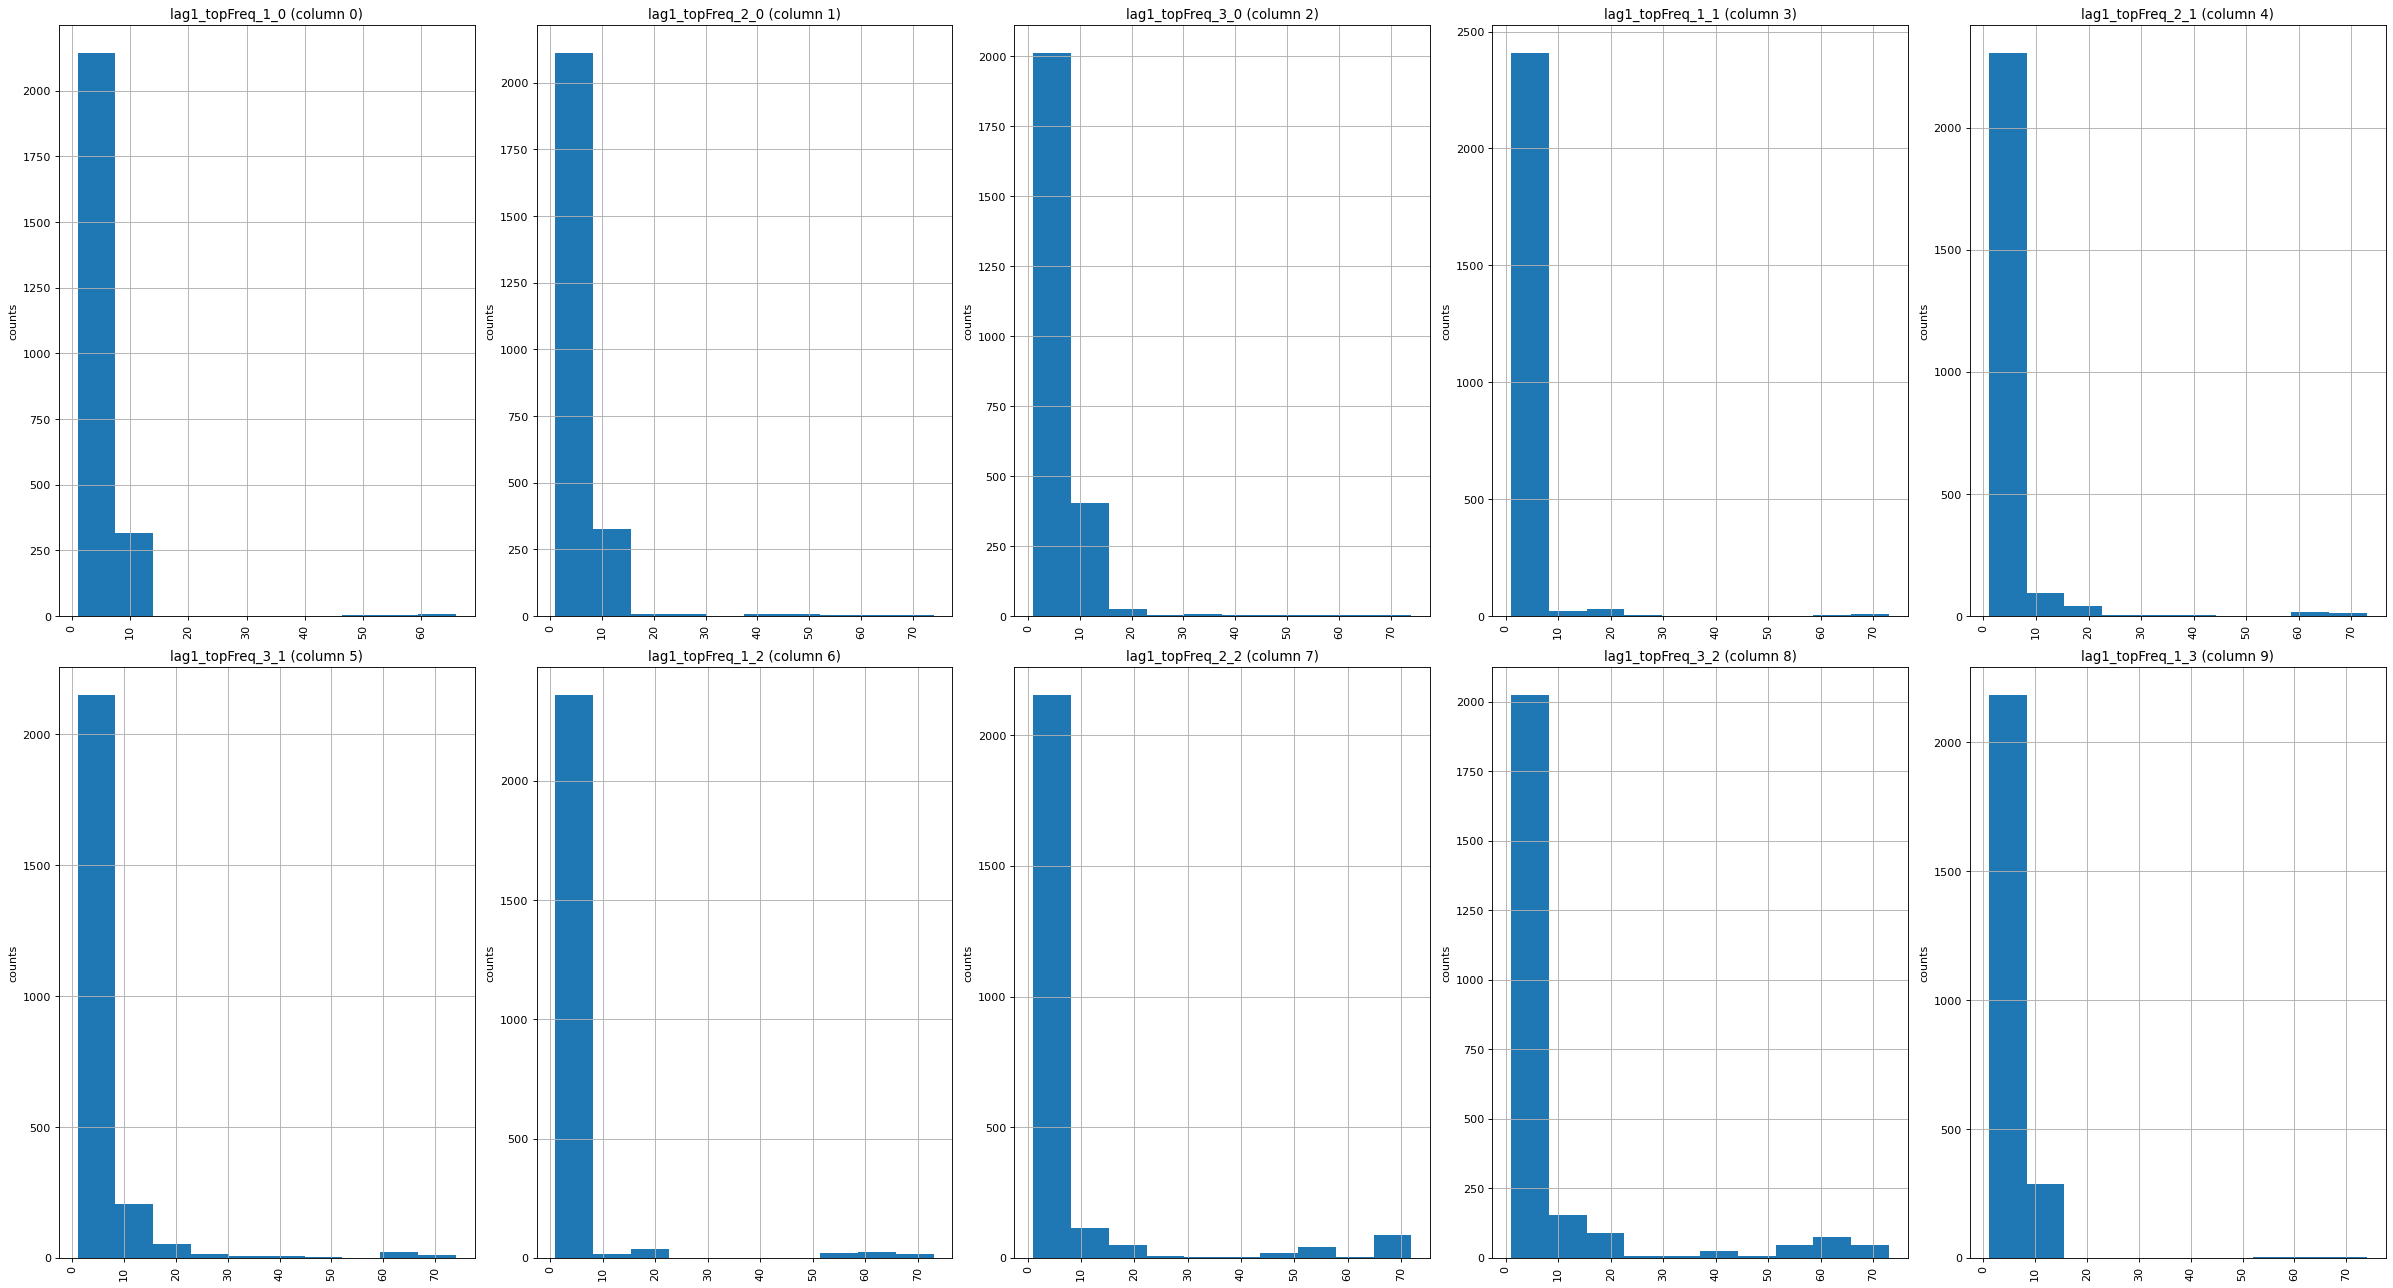

In [28]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [33]:
plotCorrelationMatrix(df1, 317)

Scatter and density plots:

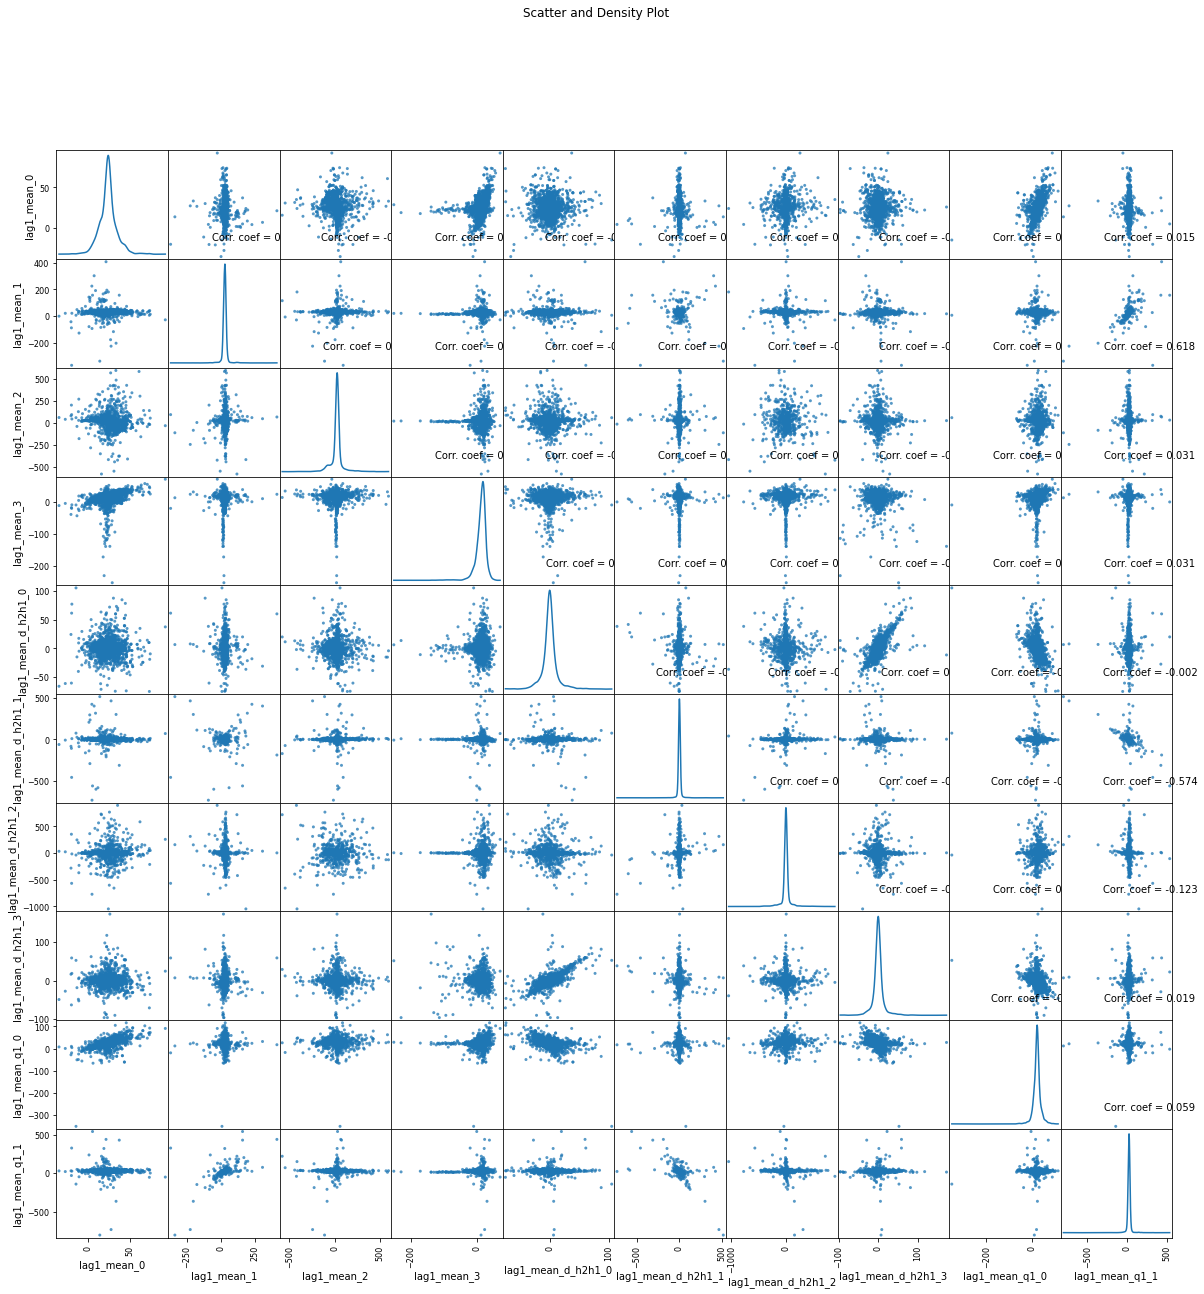

In [34]:
plotScatterMatrix(df1, 20, 10)

In [35]:
from sklearn import ensemble

In [36]:
%%time

model = ensemble.RandomForestClassifier(n_estimators=15,max_depth=4)

Wall time: 0 ns


In [3]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


NameError: name 'X' is not defined

In [4]:
# Instantiate and fit the RandomForestClassifier
model = ensemble.RandomForestClassifier(n_estimators=15,max_depth=4)
model.fit(X_train, y_train)

NameError: name 'ensemble' is not defined

In [5]:
# Make predictions for the test set
y_pred_test = model.predict(X_test)

NameError: name 'model' is not defined

In [6]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

NameError: name 'accuracy_score' is not defined